<a href="https://colab.research.google.com/github/oz-e/applied-ml/blob/main/create_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Change the path if necessary
datasets_path = 'datasets'

In [ ]:
import sys
import os

# Deploy AML code in colab
if 'google.colab' in sys.modules:
  if not os.path.exists('/content/applied-ml/'):
    !wget -q https://raw.githubusercontent.com/tsunrise/colab-github/main/colab_github.py
    import colab_github
    colab_github.github_auth(persistent_key=False)

    !git clone git@github.com:oz-e/applied-ml.git
    if not os.path.exists('/content/applied-ml/'):
      raise Exception('Please follow the instructions to add the SSH key to your account in order to clone private repo')
  %cd /content/applied-ml/

  # Install any other requirements in colab (to be converted to requirements.txt)

Looks that a private key is already created. If you have already push it to github, no action required.
 Otherwise, Please go to https://github.com/settings/ssh/new to upload the following key: 
ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIBTnaNQ26W7jyW3KfiY8qMaPMq3Wp0TWUwduzQao02wA root@d25796c166bb

Please use SSH method to clone repo.
Cloning into 'applied-ml'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 63 (delta 32), reused 13 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (63/63), 1.90 MiB | 8.14 MiB/s, done.
Resolving deltas: 100% (32/32), done.
/content/applied-ml


In [ ]:
import aml.datasets

In [ ]:
caltech101_dataset_train = aml.datasets.Caltech101(datasets_path, split='train')

Downloading...
From (original): https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp
From (redirected): https://drive.usercontent.google.com/download?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp&confirm=t&uuid=bc6c0c66-9273-4bec-afa7-563bfc6f200a
To: /content/applied-ml/datasets/caltech101/101_ObjectCategories.tar.gz
100%|██████████| 132M/132M [00:01<00:00, 82.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=175kQy3UsZ0wUEHZjqkUDdNVssr7bgh_m
To: /content/applied-ml/datasets/caltech101/Annotations.tar
100%|██████████| 14.0M/14.0M [00:00<00:00, 72.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hyarUivQE36mY6jSomru6Fjd-JzwcCzN
To: /content/applied-ml/datasets/caltech101/split.json
100%|██████████| 809k/809k [00:00<00:00, 91.5MB/s]


face


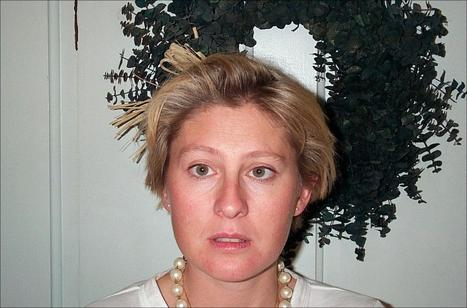

In [ ]:
print(caltech101_dataset_train.lab2cname[caltech101_dataset_train[0][1]])
caltech101_dataset_train[0][0]

In [ ]:
oxfordpets_dataset_train = aml.datasets.OxfordIIITPet(datasets_path, split='train')

100%|██████████| 792M/792M [00:24<00:00, 32.7MB/s]
100%|██████████| 19.2M/19.2M [00:01<00:00, 13.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1501r8Ber4nNKvmlFVQZ8SeUHTcdTTEqs
To: /content/applied-ml/datasets/oxford-iiit-pet/split.json
100%|██████████| 724k/724k [00:00<00:00, 103MB/s]


abyssinian


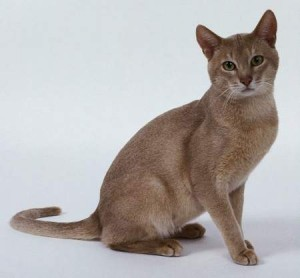

In [ ]:
print(oxfordpets_dataset_train.lab2cname[oxfordpets_dataset_train[0][1]])
oxfordpets_dataset_train[0][0]

In [ ]:
flowers102_dataset_train = aml.datasets.Flowers102(datasets_path, split='train')

100%|██████████| 345M/345M [00:11<00:00, 30.0MB/s]
100%|██████████| 502/502 [00:00<00:00, 1.21MB/s]
100%|██████████| 15.0k/15.0k [00:00<00:00, 19.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Pp0sRXzZFZq15zVOzKjKBu4A9i01nozT
To: /content/applied-ml/datasets/flowers-102/split.json
100%|██████████| 771k/771k [00:00<00:00, 96.3MB/s]


passion flower


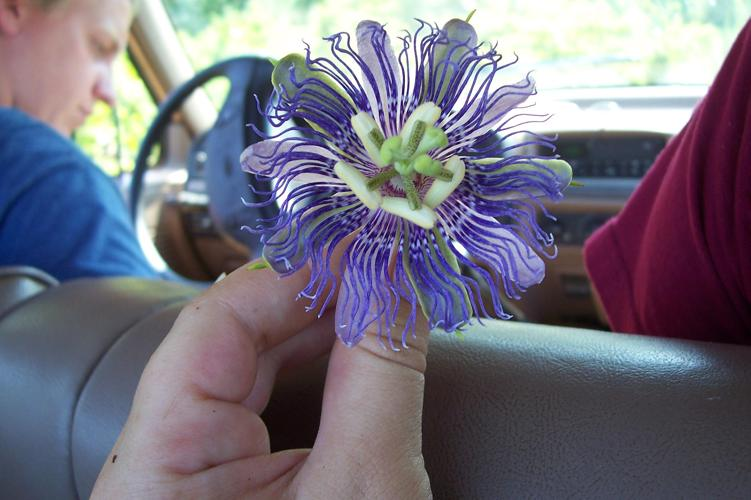

In [ ]:
print(flowers102_dataset_train.lab2cname[flowers102_dataset_train[0][1]])
flowers102_dataset_train[0][0]

In [ ]:
food101_dataset = aml.datasets.Food101(datasets_path, split='train')

100%|██████████| 5.00G/5.00G [03:15<00:00, 25.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QK0tGi096I0Ba6kggatX1ee6dJFIcEJl
To: /content/applied-ml/datasets/food-101/split.json
100%|██████████| 10.2M/10.2M [00:00<00:00, 117MB/s]


apple_pie


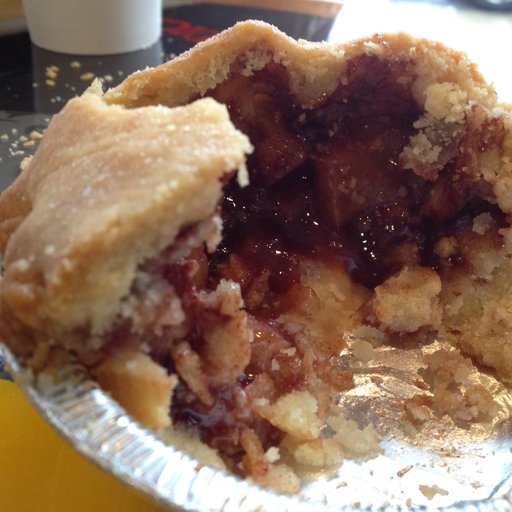

In [ ]:
print(food101_dataset.lab2cname[food101_dataset[0][1]])
food101_dataset[0][0]

In [ ]:
dtd_dataset_train = aml.datasets.DTD(datasets_path, split='train')

100%|██████████| 625M/625M [00:21<00:00, 28.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1u3_QfB467jqHgNXC00UIzbLZRQCg2S7x
To: /content/applied-ml/datasets/dtd/split.json
100%|██████████| 564k/564k [00:00<00:00, 81.6MB/s]


banded


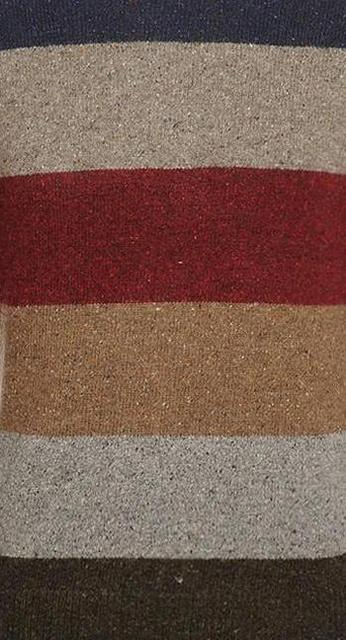

In [ ]:
print(dtd_dataset_train.lab2cname[dtd_dataset_train[0][1]])
dtd_dataset_train[0][0]

In [ ]:
eurosat_dataset_train = aml.datasets.EuroSAT(datasets_path, split='train')

100%|██████████| 94.3M/94.3M [00:00<00:00, 277MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ip7yaCWFi0eaOFUGga0lUdVi_DDQth1o
To: /content/applied-ml/datasets/eurosat/split.json
100%|██████████| 3.01M/3.01M [00:00<00:00, 167MB/s]


Annual Crop Land


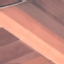

In [ ]:
print(eurosat_dataset_train.lab2cname[eurosat_dataset_train[0][1]])
eurosat_dataset_train[0][0]

In [ ]:
ucf101_dataset_train = aml.datasets.UCF101(datasets_path, split='train')

Downloading...
From (original): https://drive.google.com/uc?id=10Jqome3vtUA2keJkNanAiFpgbyC9Hc2O
From (redirected): https://drive.usercontent.google.com/download?id=10Jqome3vtUA2keJkNanAiFpgbyC9Hc2O&confirm=t&uuid=85b4cbaf-e83e-460a-8d74-141515bf1a11
To: /content/applied-ml/datasets/ucf101/UCF-101-midframes.zip
100%|██████████| 140M/140M [00:01<00:00, 133MB/s]
Downloading...
From: https://drive.google.com/uc?id=1I0S0q91hJfsV9Gf4xDIjgDq4AqBNJb1y
To: /content/applied-ml/datasets/ucf101/split.json
100%|██████████| 1.56M/1.56M [00:00<00:00, 145MB/s]


Apply_Eye_Makeup


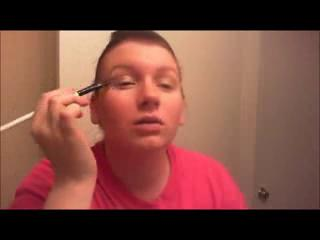

In [ ]:
print(ucf101_dataset_train.lab2cname[ucf101_dataset_train[0][1]])
ucf101_dataset_train[0][0]